<a href="https://colab.research.google.com/github/phmouras/Critical-Phenomena-in-gravitational-collapse-via-spectral-methods/blob/main/ms_a0_refinement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 300

L0 = 5

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))      # collocation points (Verificado)

colr = col[1:N+2]

r1 = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)
r = np.flip(r1)

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials):

SB = np.zeros([N+3,N+1])
rSB = np.zeros([N+3,N+1])
rrSB = np.zeros([N+3,N+1])


for i in range(N+1+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))

for i in range(N+1+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)


psi = SB[0:N+1,:]        # Base function
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]

# Initial conditions of Phi (Scalar field)

r0 = 2

sigma = 1

# Equation for Krr: momentum constraint

# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])

# Base functions for Beta

SB2 = np.zeros([N+1,N+1])
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])



for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)

    ########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
#rSBplot = np.zeros([N+1,M])
#rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

psiplot = SBplot[0:(N+1),:]




# Gauss quadrature integration:

Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1)

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+3,Nq+1])                # Base function in quadrature points
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi)


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
rrqSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])


#qKrr = np.dot(ck0, qSB1)

# Alpha na origem

psi_0 = np.zeros(N+1)

for i in range(N+1):
  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2


# Filtering
Nc = 0
Nf = N - Nc
coef_f = 36
s = 10
filter1 = np.ones(N+1)
#filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

#A0_min = 0.08
#A0_max = 0.09

tolerance = 10**(-15)

#adjustment_factor = 10**(-3) # initial A0 adjust

# Runge-Kutta parameters

h = 0.001   # step size
tf = 12
It = int(tf/h)
V = 0

# Refine A0 function:

#def refine_A0(A0_initial):
#A0 = A0_initial
A0 = 0.081
j = 3
adjustment_factor = 10**(-j)  # 1o ajuste de A0
while adjustment_factor >= tolerance:
    t=0
    # Initial conditions:

    Phi_0 = A0*r**2*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))            # Phi initial data

    inv_psi = np.linalg.inv(psi)

    a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)

    Phi = np.dot(a0, psi)        # approximative solution in t = 0
    rPhi= np.dot(a0, rpsi)

    Pi_0 = np.zeros(N+1)
    b0 = np.dot(Pi_0, psi)
    Pi = np.dot(b0, psi)

    c0 = np.zeros([N+1])     # guess value
    for i in range(N+1):
      c0[i] = 0.0001

    Chi=np.dot(c0,psi)
    rChi=np.dot(c0,rpsi)
    rrChi=np.dot(c0,rrpsi)

    H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2

    JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi     # Jacobian Matrix

    inv_JH = np.linalg.inv(JH)

    N_int = 50

    tol = 1e-18    # tolerance

    n = 0
    nf = 50

    # Newton Raphson loop:
    while n <= nf:
      Chi=np.dot(c0,psi)
      rChi=np.dot(c0,rpsi)
      rrChi=np.dot(c0,rrpsi)
      H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2
      JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi
      cnew = c0 - np.dot(H0, inv_JH)
      if min(abs(cnew-c0)) < tol:
        break
      c0 = cnew
      n = n + 1

    M0 = 2*np.dot(np.arange(1, 2*N + 2, 2), c0) # Madm(t = 0)
    # Runge Kutta 4th order
    Madm = []
    Alpha_origin = []
    phi_origin = []
    L2HC = []
    L2MC = []
    Madm_error = []
    phi_set = []

    while t<=tf:
        Phi = np.dot(a0, psi)
        rPhi = np.dot(a0, rpsi)
        rrPhi = np.dot(a0, rrpsi)
        Pi = np.dot(b0, psi)
        rPi= np.dot(b0, rpsi)
        Chi = np.dot(c0, psi)
        rChi = np.dot(c0, rpsi)
        rrChi = np.dot(c0, rrpsi)
        Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
        inv_matrix_krr = np.linalg.inv(Matrix_Krr)
        rhsk = - Pi*rPhi*np.exp(4*Chi)
        ck0 = np.dot(rhsk, inv_matrix_krr)
        Krr = np.dot(ck0, SB1)
        rKrr = np.dot(ck0, rSB1)
        Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi
        inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
        rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
        al0 = np.dot(rhsal, inv_matrix_alpha)
        Alpha = 1 + np.dot(al0, psi)
        rAlpha = np.dot(al0, rpsi)
        rrAlpha = np.dot(al0, rrpsi)
        Matrix_Beta = rSB2/r - SB2/r**2
        inv_matrix_beta = np.linalg.inv(Matrix_Beta)
        rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
        be0 = np.dot(rhsbe , inv_matrix_beta)
        Beta = np.dot(be0, SB2)
        rBeta = np.dot(be0, rSB2)
        db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
        dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)
        da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
        K1 = h*(dc)
        L1 = h*(da)
        N1 = h*(db)

        # L2-error associated to the Hamiltonian constraint
        qPhi = np.dot(a0, qpsi)
        rqPhi= np.dot(a0, rqpsi)
        qPi = np.dot(b0, qpsi)
        qChi = np.dot(c0, qpsi)
        rqChi = np.dot(c0, rqpsi)
        rrqChi = np.dot(c0, rrqpsi)
        qKrr = np.dot(ck0, qSB1)
        H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
        L2HC.append((1/2*np.dot(H**2,wq_col))**(1/2))    # L2 error of HC

        # L2-error associated to the momentum constraint
        rqKrr = np.dot(ck0, rqSB1)
        M = 2*rqChi*qKrr + rqKrr + 3/rq*qKrr + qPi*rqPhi*np.exp(4*qChi)
        L2MC.append((1/2*np.dot(M**2,wq_col))**1/2)    # L2 error of HC

        # Alpha origin
        Alpha_0 = 1 + np.dot(al0, psi_0)
        Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
        #out_a.write(str(t) + " " + str(Alpha_0))
        #out_a.write(',\n')

        # Phi origin:
        phi_0 = np.dot(a0, psi_0)
        phi_origin.append(phi_0)
        #out_p.write(str(t) + " " + str(phi_0))
        #out_p.write(',\n')

        # Error ADM mass:
        Madm = 2*np.dot(np.arange(1, 2*N + 2, 2), c0)
        Madm_pc = abs(Madm - M0)/M0 * 100
        Madm_error.append(Madm_pc)

        # Second step
        Phi = np.dot(a0 + L1/2, psi)
        rPhi= np.dot(a0 + L1/2 , rpsi)
        rrPhi = np.dot(a0 + L1/2, rrpsi)
        Pi = np.dot(b0 + N1/2, psi)
        rPi= np.dot(b0 + N1/2, rpsi)
        Chi = np.dot(c0 + K1/2, psi)
        rChi = np.dot(c0 + K1/2, rpsi)
        rrChi = np.dot(c0 + K1/2, rrpsi)
        Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
        inv_matrix_krr = np.linalg.inv(Matrix_Krr)
        rhsk = - Pi*rPhi*np.exp(4*Chi)
        ck0 = np.dot(rhsk, inv_matrix_krr)
        Krr = np.dot(ck0, SB1)
        rKrr = np.dot(ck0, rSB1)
        Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi
        inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
        rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
        al0 = np.dot(rhsal, inv_matrix_alpha)
        Alpha = 1 + np.dot(al0, psi)
        rAlpha = np.dot(al0, rpsi)
        rrAlpha = np.dot(al0, rrpsi)
        Matrix_Beta = rSB2/r - SB2/r**2
        inv_matrix_beta = np.linalg.inv(Matrix_Beta)
        rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
        be0 = np.dot(rhsbe , inv_matrix_beta)
        Beta = np.dot(be0, SB2)
        rBeta = np.dot(be0, rSB2)
        db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
        dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)
        da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
        K2 = h*(dc)
        L2 = h*(da)
        N2 = h*(db)

        # Third step
        Phi = np.dot(a0 + L2/2, psi)
        rPhi = np.dot(a0 + L2/2 , rpsi)
        rrPhi = np.dot(a0 + L2/2, rrpsi)
        Pi = np.dot(b0 + N2/2, psi)
        rPi= np.dot(b0 + N2/2, rpsi)
        Chi = np.dot(c0 + K2/2, psi)
        rChi = np.dot(c0 + K2/2, rpsi)
        rrChi = np.dot(c0 + K2/2, rrpsi)
        Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
        inv_matrix_krr = np.linalg.inv(Matrix_Krr)
        rhsk = - Pi*rPhi*np.exp(4*Chi)
        ck0 = np.dot(rhsk, inv_matrix_krr)
        Krr = np.dot(ck0, SB1)
        rKrr = np.dot(ck0, rSB1)
        Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi
        inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
        rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
        al0 = np.dot(rhsal, inv_matrix_alpha)
        Alpha = 1 + np.dot(al0, psi)
        rAlpha = np.dot(al0, rpsi)
        rrAlpha = np.dot(al0, rrpsi)
        Matrix_Beta = rSB2/r - SB2/r**2
        inv_matrix_beta = np.linalg.inv(Matrix_Beta)
        rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
        be0 = np.dot(rhsbe , inv_matrix_beta)
        Beta = np.dot(be0, SB2)
        rBeta = np.dot(be0, rSB2)
        db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
        dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)
        da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
        K3 = h*(dc)
        L3 = h*(da)
        N3 = h*(db)

        # Forth step
        Phi = np.dot(a0 + L3, psi)
        rPhi= np.dot(a0 + L3 , rpsi)
        rrPhi = np.dot(a0 + L3, rrpsi)
        Pi = np.dot(b0 + N3, psi)
        rPi= np.dot(b0 + N3, rpsi)
        Chi = np.dot(c0 + K3, psi)
        rChi = np.dot(c0 + K3, rpsi)
        rrChi = np.dot(c0 + K3, rrpsi)
        Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
        inv_matrix_krr = np.linalg.inv(Matrix_Krr)
        rhsk = - Pi*rPhi*np.exp(4*Chi)
        ck0 = np.dot(rhsk, inv_matrix_krr)
        Krr = np.dot(ck0, SB1)
        rKrr = np.dot(ck0, rSB1)
        Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi
        inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
        rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
        al0 = np.dot(rhsal, inv_matrix_alpha)
        Alpha = 1 + np.dot(al0, psi)
        rAlpha = np.dot(al0, rpsi)
        rrAlpha = np.dot(al0, rrpsi)
        Matrix_Beta = rSB2/r - SB2/r**2
        inv_matrix_beta = np.linalg.inv(Matrix_Beta)
        rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
        be0 = np.dot(rhsbe , inv_matrix_beta)
        Beta = np.dot(be0, SB2)
        rBeta = np.dot(be0, rSB2)
        db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
        dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)
        da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
        K4 = h*(dc)
        L4 = h*(da)
        N4 = h*(db)

        # Evolution functions
        a0 = filter1*(a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4))
        b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
        c0 = filter1*(c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4))
        phi_set.append(np.dot(a0, psiplot))
    #    out_a.close()
    #    out_p.close()

        t = t + h

#        print(Alpha_0, f"t = {t}", sep='\n')

        if t > 8:
          if Alpha_0 > 0.4:     # Alpha_origin goes to 1
            A0 += adjustment_factor
            print(f"Ajustando A0 para: {A0}")
            break

          elif Alpha_0 < 0.005:
            A0 -= adjustment_factor
            j += 1
            adjustment_factor = 10**(-j)
            print(f"Adjustment factor: {adjustment_factor}")
            break

#        return A0


#        if adjustment_factor < tolerance:
#          print("Convergência alcançada!")
#          break







Ajustando A0 para: 0.076
Ajustando A0 para: 0.077
Ajustando A0 para: 0.078
Ajustando A0 para: 0.079
Ajustando A0 para: 0.08
Ajustando A0 para: 0.081
Ajustando A0 para: 0.082
Adjustment factor: 0.0001
Ajustando A0 para: 0.0811
Ajustando A0 para: 0.08120000000000001
Ajustando A0 para: 0.08130000000000001
Ajustando A0 para: 0.08140000000000001
Ajustando A0 para: 0.08150000000000002
Ajustando A0 para: 0.08160000000000002
Adjustment factor: 1e-05
Ajustando A0 para: 0.08151000000000001
Ajustando A0 para: 0.08152000000000001
Ajustando A0 para: 0.08153
Adjustment factor: 1e-06
Ajustando A0 para: 0.08152100000000001
Ajustando A0 para: 0.08152200000000001
Ajustando A0 para: 0.08152300000000001
Adjustment factor: 1e-07
Ajustando A0 para: 0.08152210000000001
Ajustando A0 para: 0.08152220000000002
Ajustando A0 para: 0.08152230000000002
Ajustando A0 para: 0.08152240000000002
Ajustando A0 para: 0.08152250000000003
Ajustando A0 para: 0.08152260000000003
Ajustando A0 para: 0.08152270000000003
Ajustando

In [ ]:
A0

NameError: name 'A0' is not defined

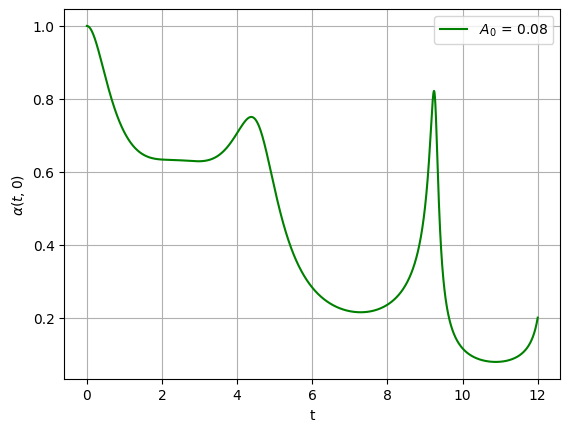

In [ ]:
t1 = np.linspace(0, tf, len(Alpha_origin))

# Searching for critical amplitude:

Alpha_origin_disp = Alpha_origin
#Alpha_origin_collapse = Alpha_origin

plt.plot(t1, Alpha_origin_disp, color = "g", label = f"$A_0$ = 0.08")
#plt.plot(t1, Alpha_origin_collapse, color = "y", label = f"$A_0$ = 0.09")
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()